# Маркетинговый анализ
***

# Описание проекта

Вы — маркетинговый аналитик развлекательного приложения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Оглавление<a class='anchor' id='TOC'></a>

* **[I. Загрузка и подготовка данных](#1)**
    - [1) Импортируем библиотеки, объявим класс MetricCalculator для анализа](#1_1)
    - [2) Прочитаем данные](#1_2)
    - [3) Выведем первые и последние пять строк каждой из таблиц, общую информацию](#1_3)
    - [Вывод](#1_conclusion)
<br></br>
* **[II. Исследовательский анализ данных](#2)**
    - [1) Получим профили пользовтеля для анализа](#2_1)
    - [2) Установим момент и горизонт анализа данных](#2_2)
    - [3) Исследуем сведения о посещении сайтах](#2_3)
        - [из каких стран пользователи](#2_3_1)
        - [устройства пользователей](#2_3_2)
        - [информация о покупках](#2_3_3)
        - [каналы привлечения пользователей](#2_3_4)
        - [информация о расходах](#2_3_5)
        - [сравним TipTop со всеми остальными платными каналами](#2_3_6)
    - [Выводы по итогам EDA](#2_conclusion)
<br></br> 
* **[III. Маркетинговый анализ](#3)**
    - [1) Проверим окупаемость рекламы](#3_1)
    - [2) Проверим характеристики пользователей](#3_2)
        - [страна первого посещения пользователей](#3_2_1)
        - [источник привлечения пользователей](#3_2_2)
        - [проверим связь пользователей из США и канал привлечения](#3_2_3)
        - [проверим каналы привлечения на окупаемость](#3_2_4)
        - [устройство пользователей](#3_2_5)
        - [устройство пользователей и европейский рынок](#3_2_6)
    - [3) Проверим конверсию](#3_3)
        - [посчитаем общую конверсию](#3_3_1)
        - [посчитаем конверсию по регионам](#3_3_2)
        - [посчитаем конверсию по каналам](#3_3_3)
        - [посчитаем конверсию по устройствам](#3_3_4)
        - [посчитаем длительность пользовательской сесии](#3_3_5)
    - [4) Проверим удержание](#3_4)
        - [посчитаем общее удержание](#3_4_1)
        - [посчитаем удержание по регионам](#3_4_2)
        - [посчитаем удержание по каналам](#3_4_3)
        - [посчитаем удержание по устройствам](#3_4_4)
    - [Выводы по итогам маркетингового анализа](#3_conclusion)
<br></br>

# I. Загрузка и подготовка данных<a class='anchor' id='1'>
***

## 1) Импортируем библиотеки, объявим класс MetricCalculator для анализа<a class="anchor" id="1_1"></a>

In [1]:
# тут импорты
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from calculator.calculator import MetricCalculator
from IPython.display import display
from datetime import datetime

In [2]:
# тут класс

In [3]:
# тут полезное
pd.set_option('display.float_format', lambda x: '%.2f' % x)

[В оглавление](#TOC)

## 2) Прочитаем данные<a class="anchor" id="1_2"></a>

### - описание данных

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.


Структура visits_info_short.csv|Описание|Структура orders_info_short.csv|Описание|Структура costs_info_short.csv|Описание
:-----|:-----|:-----|:-----|:-----|:-----  
User Id|уникальный идентификатор пользователя|User Id|уникальный идентификатор пользователя|Channel|идентификатор рекламного источника
Region|страна пользователя|Event Dt|дата и время покупки|Dt|дата проведения рекламной кампании
Device|тип устройства пользователя|Revenue|сумма заказа|Costs|расходы на эту кампанию
Channel|идентификатор источника перехода| | | | 
Session Start|дата и время начала сессии| | | | 
Session End|дата и время окончания сессии| | | | 

### - создадим экземпляр класса с путями до данных, приведем наименование колонок к едином формату, установим нужный тип данных

In [4]:
calc = MetricCalculator('datasets/visits_info_short.csv', 'datasets/orders_info_short.csv', 'datasets/costs_info_short.csv')

In [5]:
calc.columns_fixer()

Cоздан экземпляр класса:
- данные прочитаны, 
- наименование колонок приведено к единому формату,
- колонки с датами приведены к соответствующему формату.

Датасеты доступны через экземпляр класса по именам **visits, orders, costs**.

## 3) Выведем первые пять первых и последних строк каждой из таблиц, общую информацию<a class="anchor" id="1_3"></a>

### - visits - посещение сайта

In [37]:
from IPython.display import display

In [39]:
display(calc.visits, calc.visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


None

In [6]:
calc.visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [7]:
calc.visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


&#9889; **Вывод:** в датасете с информацией о посещениях сайта 309 901 строка, без пропусков, без проблем с типами данных.

### - orders - информация о покупках

In [8]:
calc.orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [9]:
calc.orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


&#9889; **Вывод:** в датасете с информацией о покупках 40 212 строк (13% от числа визитов), без пропусков, без проблем с типами данных.

### - costs - информация о расходах

In [10]:
calc.costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80


In [11]:
calc.costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


&#9889; **Вывод:** в датасете с информацией расходах 1800, без пропусков, без проблем с типами данных.

### - проверим наличие полных дубликатов

In [12]:
datasets = [calc.visits, calc.orders, calc.costs]
duplicated_sum = 0
for dataset in datasets:
    duplicated_sum += (dataset.duplicated() == True).sum()
print(duplicated_sum)

0


Полных дубликатов нет

## Вывод<a class="anchor" id="1_conclusion"></a>

1. Прочитали данные с помощью специального класса, наименование колонок приведено к единому формату, колонки с датами приведены к соответствующему формату. Датасеты доступны через экземпляр класса по именам visits, orders, costs.
2. Во всех датасетах нет проблем с типами данных, полные дубликаты отсутствуют, нет пропусков.

[В оглавление](#TOC)

# II. Исследовательский анализ данных<a class='anchor' id='2'>
***

## 1) Получим профили пользователей<a class="anchor" id="2_1"></a>

In [13]:
profiles = calc.get_profiles()

In [14]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.21


[В оглавление](#TOC)

## 2) Установим момент и горизонт анализа данных<a class="anchor" id="2_2"></a>

По условиям задачи на календаре 1 ноября 2019 года, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения:

In [15]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

[В оглавление](#TOC)

## 3) Исследуем сведения о посещении сайтах<a class="anchor" id="2_3"></a>

### - из каких стран пользователи<a class='anchor' id='2_3_1'></a>

В отношении user_id считать статистику неинформативно - поэтому исключим данный столбец**

In [16]:
calc.visits.describe(exclude=['int64']).T.fillna('---')

,count,unique,top,freq,first,last
region,309901,4,United States,207327,---,---
device,309901,4,iPhone,112603,---,---
channel,309901,11,organic,107760,---,---
session_start,309901,306813,2019-06-27 14:56:41,3,2019-05-01 00:00:41,2019-10-31 23:59:23
session_end,309901,306793,2019-07-16 02:23:30,3,2019-05-01 00:07:06,2019-11-01 01:38:46


Проверим записи о пользователях из каких стран содержит таблица, определим процент платящих:

In [17]:
countries_count_by_payer = calc.grouped_summary(profiles, 'region', 'страна')
countries_count_by_payer

,страна,платящие,% от платящих,число клиентов
0,Germany,616,6.94,14981
1,France,663,7.47,17450
2,UK,700,7.88,17575
3,United States,6902,77.72,100002
4,---,8881,100.00,150008


Визуализируем соотношение пользователей по странам:

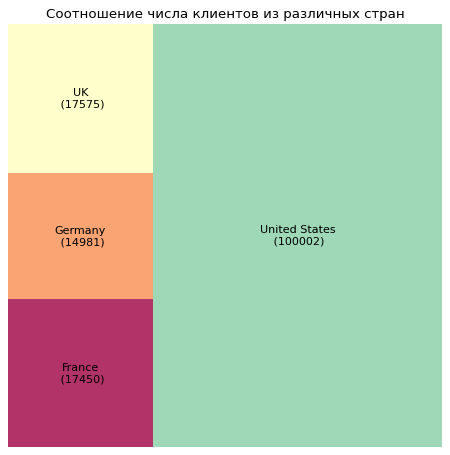

In [18]:
calc.square_plot(profiles, 'region', title='Соотношение числа клиентов из различных стран')

<Figure size 560x560 with 0 Axes>

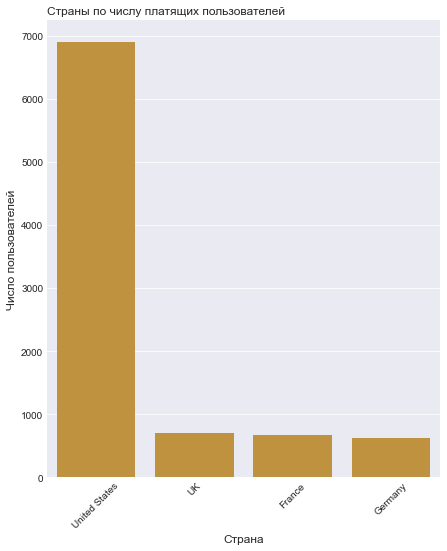

In [19]:
title = 'Страны по числу платящих пользователей'
xlabel = 'Страна'
ylabel = 'Число пользователей'
data = countries_count_by_payer.iloc[:4].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='страна', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод:**
- из 309 901 наблюдений - 207 327 (67%) сделаны в отношении пользователей из США,
- в датасете 150 008 уникальных пользователей, из которых платят 8881 (6%).
- из 8881 платящих пользователей - 6902 (77.72%) из США, 700 (7.88%) из Великобритании, 663 (7.47%) из Франции и 616 (6.94%) из Германии.

[В оглавление](#TOC)

### - устройства пользователей<a class='anchor' id='2_3_2'></a>

In [20]:
devices_by_payer = calc.grouped_summary(profiles, 'device', 'устройство')
devices_by_payer

,устройство,платящие,% от платящих,число клиентов
0,PC,1537,17.31,30455
1,Mac,1912,21.53,30042
2,Android,2050,23.08,35032
3,iPhone,3382,38.08,54479
4,---,8881,100.00,150008


Визуализируем соотношение устройств по числу уникальных пользователей:

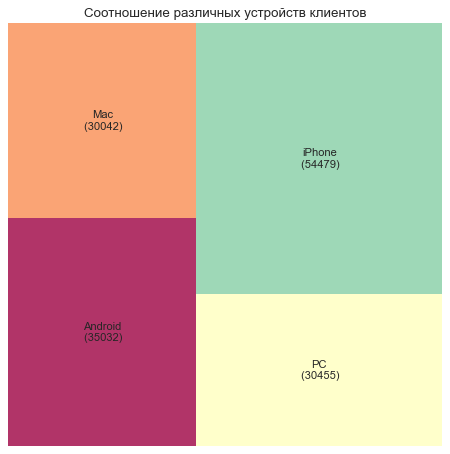

In [21]:
calc.square_plot(profiles, 'device', title='Соотношение различных устройств клиентов')

<Figure size 560x560 with 0 Axes>

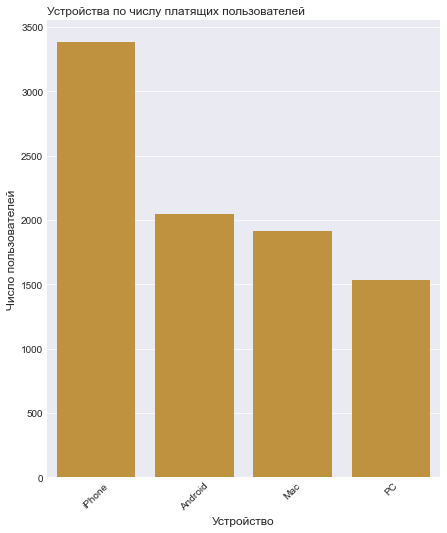

In [22]:
title = 'Устройства по числу платящих пользователей'
xlabel = 'Устройство'
ylabel = 'Число пользователей'
data = devices_by_payer.iloc[:4].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='устройство', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод:**
- клиенты пользвуются приложением с четырех устройств - PC, Mac, Android, iPhone,
- наблюдения об устройствах распределены равномернее, чем между странами,
- из 8881 платящих - 3382 (38.08%) пользователей iPhone, 2050 (23.08%) пользователей Android, 1912 пользователей Mac (21.53%), пользователей PC (17.31%).

[В оглавление](#TOC)

### - информация о покупках<a class='anchor' id='2_3_3'></a>

In [23]:
calc.orders.describe(include=['float64']).T

,count,mean,std,min,25%,50%,75%,max
revenue,40212.00,5.37,3.45,4.99,4.99,4.99,4.99,49.99


In [24]:
calc.orders.describe(include=['object', 'datetime64[ns]']).T

,count,unique,top,freq,first,last
event_dt,40212,40163,2019-10-26 06:49:22,2,2019-05-01 00:28:11,2019-10-31 23:56:56


С учетом того, что 75%-процентиль - 4.99 (совпадающий с медианой, 25%-процентилем и минимуом), максимальная сумма выручки - 49.99, проверим какие значения выручки есть в датасете:

In [25]:
sorted(calc.orders.revenue.unique())

[4.99, 5.99, 9.99, 19.99, 49.99]

Всего пять значений стоимости услуги. Проверим сколько пользователей платят больше 4.99, возможно, таких пользователей стоит рассматривать отдельно:

In [26]:
max_revenue = calc.orders.groupby('revenue').agg({'user_id': 'count'}).reset_index()
max_revenue['%'] = (max_revenue['user_id'] / len(calc.orders)) * 100
max_revenue

,revenue,user_id,%
0,4.99,38631,96.07
1,5.99,780,1.94
2,9.99,385,0.96
3,19.99,204,0.51
4,49.99,212,0.53


Примерно 5% пользователей платят больше базовой стоимости. Посчитаем общее число таких пользователей:

In [27]:
sum(max_revenue[max_revenue['revenue'] > 4.99]['user_id'])

1581

&#9889; **Вывод**

В датасете с информацией о покупках:

- остутствуют сведения о валюте в которой выражена выручка,
- принимая во внимание, что 67% пользователей из США, можно предположить, что валюта выручки - доллары США,
- выявлено 5 различных стоимостей услуг - 4.99, 5.99, 9.99, 19.99, 49.99.
- минимальная сумма выручки - 4.99, средняя - 5.37 (при медианной и 75%-процентиле - 4.99), максимальная - 49.99,
- из 40 185 платящих пользователей - 1581 (4%) платит больше базового тарифа,
- самое раннее наблюдение о первом действии совпадает с датасетом о посещениях - 01.05.2019 года, самое позднее - 31.10.2019 года.

[В оглавление](#TOC)

### - каналы привлечения пользователей<a class='anchor' id='2_3_4'></a>

In [28]:
channels_by_payer = calc.grouped_summary(profiles, 'channel', 'канал')
channels_by_payer

,канал,платящие,% от платящих,число клиентов
0,MediaTornado,156,1.76,4364
1,YRabbit,165,1.86,4312
2,lambdaMediaAds,225,2.53,2149
3,OppleCreativeMedia,233,2.62,8605
4,LeapBob,262,2.95,8553
5,RocketSuperAds,352,3.96,4448
6,AdNonSense,440,4.95,3880
7,WahooNetBanner,453,5.10,8553
8,organic,1160,13.06,56439
9,TipTop,1878,21.15,19561


Визуализируем соотношение уникальных пользователей по источникам привлечения:

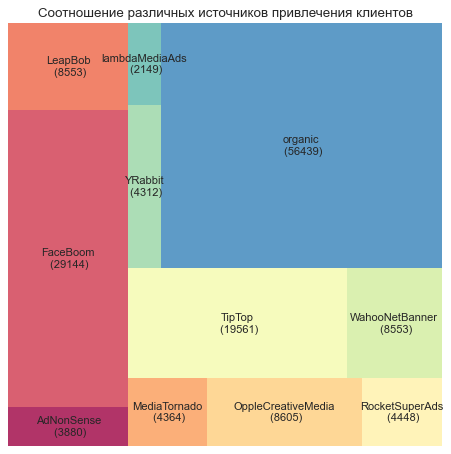

In [29]:
calc.square_plot(profiles, 'channel', title='Соотношение различных источников привлечения клиентов')

<Figure size 560x560 with 0 Axes>

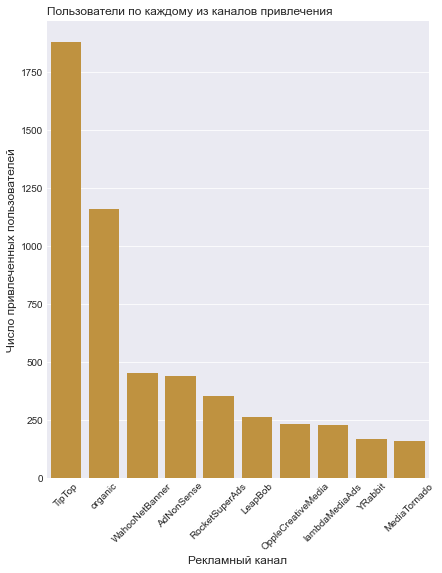

In [30]:
title = 'Пользователи по каждому из каналов привлечения'
xlabel = 'Рекламный канал'
ylabel = 'Число привлеченных пользователей'
data = channels_by_payer.iloc[:10].sort_values(by='платящие', ascending=False)
calc.sns_catplot(x='канал', y='платящие', data=data, title=title, xlabel=xlabel, ylabel=ylabel)

&#9889; **Вывод:**

- одиннадцать источников привлечения клиентов: один естественный, без посредников, десять - рекламные каналы,
- без посредников пришло более трети уникальных пользователей - 56 439 (37.6 %), из которых 1160 конвертировались в платящих (13.06% от платящих пользователей),
- из платящих 61.2% пришли из двух источников - 3557 (40.05%) пользователей привел FaceBoom, 1878 (21.15%) TipTop,
- с учетом естественного источника, FaceBoom и TipTop на - оставшиеся 25.74% приходятся на 8 других каналов,
- эффективность каналов еще предстоит выяснить, но доля FaceBoom и TipTop из десяти платных впечатляет.

[В оглавление](#TOC)

### - информация о расходах<a class='anchor' id='2_3_5'></a>

In [31]:
calc.costs.describe().T

,count,mean,std,min,25%,50%,75%,max
costs,1800.00,58.61,107.74,0.80,6.50,12.29,33.60,630.00


Минимально - 0.80, средняя стоимость источника - 58.61 (при медианой - 12.29 и 75%-процентиле равным 33.60). Есть очень дорогие источники. Проверим среднюю стоимость привлечения по каждому источнику в разрезе на клиента: 

In [32]:
# посчитаем сколько раз обращались к каждому источнику
applied_to_channel = (calc.costs.groupby('channel')
                                .agg({'dt': 'count'})
                                .reset_index()
                                .rename(columns={'channel': 'канал', 'dt': 'число обращений'}))

# посчитаем отдельно среднюю стоимость клиента по источнику, чтобы потом не избавляться от мультиндекса
channels_mean_costs = (profiles.groupby('channel')
                               .agg({'acquisition_cost': 'mean'})
                               .reset_index()
                               .rename(columns={'channel': 'канал',
                                                'acquisition_cost': 'стоимость клиента'}))

# посчитаем затраченную на каждый из каналов сумму и % от бюджета
channels_costs = (profiles.groupby('channel')
                          .agg({'acquisition_cost': 'sum'})
                          .reset_index()
                          .sort_values(by='acquisition_cost'))
channels_costs['% от рекламного бюджета'] = (channels_costs['acquisition_cost'] * 100 / 
                                             sum(channels_costs['acquisition_cost']))
channels_costs = channels_costs.rename(columns={'channel': 'канал',
                                                'acquisition_cost': 'сумма трат',
                                                'acquisition_cost_y': 'средняя стоимость'})

# объединим таблицу с затратами с таблицей обращений и числом привлеченных
channels_costs = channels_costs.merge(channels_by_payer, on='канал')
channels_costs = channels_costs.merge(channels_mean_costs, on='канал')
channels_costs = channels_costs.merge(applied_to_channel, on='канал')

# дополним таблицу строкой с естественным источником
organic_row = channels_by_payer.query('канал == "organic"')
channels_costs = channels_costs.append(organic_row, ignore_index=True).fillna(0)

# дополним таблицу суммирующую строку
sums_row = pd.Series(['---', sum(channels_costs['сумма трат']),
                      sum(channels_costs['% от рекламного бюджета']),
                      sum(channels_costs['платящие']),
                      sum(channels_costs['% от платящих']),
                      sum(channels_costs['число клиентов']),
                      sum(channels_costs['стоимость клиента']),
                      sum(channels_costs['число обращений'])],
                      index=channels_costs.columns)
channels_costs = channels_costs.sort_values(by='сумма трат')
channels_costs = channels_costs.append(sums_row, ignore_index=True)

channels_costs

,канал,сумма трат,% от рекламного бюджета,платящие,% от платящих,число клиентов,стоимость клиента,число обращений
0,organic,0.00,0.00,1160,13.06,56439,0.00,0.00
1,YRabbit,944.22,0.90,165,1.86,4312,0.22,180.00
2,MediaTornado,954.48,0.90,156,1.76,4364,0.22,180.00
3,lambdaMediaAds,1557.60,1.48,225,2.53,2149,0.72,180.00
4,LeapBob,1797.60,1.70,262,2.95,8553,0.21,180.00
5,RocketSuperAds,1833.00,1.74,352,3.96,4448,0.41,180.00
6,OppleCreativeMedia,2151.25,2.04,233,2.62,8605,0.25,180.00
7,AdNonSense,3911.25,3.71,440,4.95,3880,1.01,180.00
8,WahooNetBanner,5151.00,4.88,453,5.10,8553,0.60,180.00
9,FaceBoom,32445.60,30.75,3557,40.05,29144,1.11,180.00


Визуализируем траты на каналы:

<Figure size 560x560 with 0 Axes>

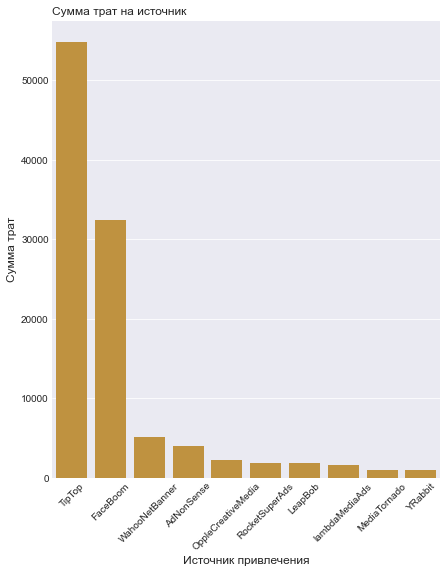

In [33]:
data = channels_costs.query('канал not in ["organic", "---"]').sort_values(by='сумма трат', ascending=False)
ylabel = 'Сумма трат'
xlabel = 'Источник привлечения'
title = 'Сумма трат на источник'
calc.sns_catplot(x='канал', y='сумма трат', data=data, xlabel=xlabel, ylabel=ylabel, title=title)

&#9889; **Вывод:**

- к каждому из рекламных источников обращались 180 раз,
- самое раннее наблюдение о понесенных расходах - 01.05.2019 года, самое позднее - 27.10.2019 года,
- за период от 01.05.2019 до 27.10.2019 года потратили 105 497 долларов,
- львиная доля бюджета - 87 196.90 долларов (82.65%) ушла на TipTop - 54751.30 долларов (51.9%) и FaceBoom - 32445.60 долларов (30.75%).
- самый дорогой клиент пришел из TipTop - 2.80 долларов, на втором месте клиент из FaceBoom - 1.11 долларов, на третьем месте AdNonSense - 1.01 доллар, клиенты из остальных источников стоили в 60 центов от 21 цента.
- кроме FaceBoom и TipTop требуется проверить AdNonSense - через канал приходит совсем мало новых пользователей (3880), и хотя 11% (440) стали платить стоимость клиента в 1.01 доллар соперничает с FaceBoom. То есть канал может быть и эффективный, но из-за масштаба траты на него не оправданы,
- исходя из представленных данных, представляется, что самый неэффективный канал TipTop - канал обеспечил 21.15% (1878) от всех платящих (8881), но сумма трат на канал - 54751.30 долларов, стоимость одного клиента 2.80 долларов выбивается из общего ряда.


[В оглавление](#TOC)

### - сравним TipTop со всеми остальными платными каналами<a class='anchor' id='2_3_6'></a>

In [34]:
# отберем TipTop
tip_top = pd.DataFrame(channels_costs.query('канал == "TipTop"').sum()).reset_index()
tip_top = tip_top.rename(columns={'index': 'аттрибут', 0: 'TipTop'})

# отберем остальных, суммируем их результаты
others = pd.DataFrame(channels_costs.query('канал not in ["TipTop", "organic", "---"]').sum()).reset_index()
others = others.rename(columns={'index': 'аттрибут', 0: 'остальные'})

tip_top.merge(others, on='аттрибут').drop([0, 6, 7])

,аттрибут,TipTop,остальные
1,сумма трат,54751.30,50746.00
2,% от рекламного бюджета,51.90,48.10
3,платящие,1878,5843
4,% от платящих,21.15,65.79
5,число клиентов,19561,74008


&#9889; **Вывод:**

- TipTop не оправдывают себя: сумма трат превышает все девять источников вместе взятые на 4005,30 долларов, но он приводит в три раза меньше новых клиентов (19561 против 74008), и в три раза меньше платящих клиентов (1878 - 21.15% против 5843 - 65.79%).

[В оглавление](#TOC)

## Выводы по итогам EDA<a class="anchor" id="2_conclusion"></a>

Исходя из представленных данных данных можно сделать выводы:


**1. Минимальная и максимальная даты привлечения пользователей**
- самое раннее наблюдение о первом действии - 01.05.2019 года, самое позднее - 31.10.2019 года,


**2. Страны происхождения посетителей и клиентов**
- клиенты приходят из четырех стран – США, Великобритании, Франции и Германии,
- из 309 901 наблюдений - 207 327 (67%) сделаны в отношении пользователей из США,
- в датасете 150 008 уникальных пользователей, из которых платят 8881 (6%),
- из 8 881 платящих пользователей - 6902 (77.72%) из США, 700 (7.88%) из Великобритании, 663 (7.47%) из Франции и 616 (6.94%) из Германии,
- отсутствуют сведения о валюте в которой выражена выручка: принимая во внимание, что 67% пользователей из США, можно предположить, что валюта выручки - доллары США,


**3. Устройства посетителей и клиентов**
- клиенты пользуются приложением с четырех устройств - PC, Mac, Android, iPhone,
- из 8881 платящих – 3 382 (38.08%) пользователей iPhone, 2 050 (23.08%) пользователей Android, 1912 пользователей Mac (21.53%), пользователей PC (17.31%).


**4. Источники привлечения посетителей и клиентов**
- привлечение клиентов идет по одиннадцати источникам: один естественный, без посредников, десять - рекламные каналы,
- без посредников пришло более трети уникальных пользователей - 56 439 (37.6 %),  32% (48 705) привели FaceBoom и TipTop, на оставшиеся 8 источников приходится 29% (44 864) от уникальных клиентов,
- из платящих клиентов 61.2% пришли из двух источников – 3 557 (40.05%) пользователей привел FaceBoom, 1 878 (21.15%) TipTop, 25.74% (2  286) приходятся на 8 других каналов, - еще 13.06% (1160) конвертировались из естественного трафика,


**5. Расходы на рекламу**
- за период от 01.05.2019 до 27.10.2019 года на рекламу потратили 105 497 долларов,
- к каждому из рекламных источников обращались 180 раз,
- львиная доля бюджета - 87 196.90 долларов (82.65%) ушла на TipTop - 54751.30 долларов (51.9%) и FaceBoom - 32445.60 долларов (30.75%),
- самая высокая стоимость привлечения у TipTop - 2.80 долларов, на втором месте FaceBoom - 1.11 долларов, на третьем месте AdNonSense - 1.01 доллар, привлечение клиентов из - остальных источников обошлось в среднем в стоимость от 60 центов от 21 цента.


**6. Неээфективные источники**
- TipTop не оправдывает себя: сумма трат превышает все девять источников вместе взятые на 4005,30 долларов, но он приводит в три раза меньше новых клиентов (19561 против 74008), в три раза меньше платящих клиентов (1878 - 21.15% против 5843 - 65.79%) при средней стоимости одного клиента 2.80 долларов,
- кроме FaceBoom и TipTop требуется проверить AdNonSense - через канал приходит совсем мало новых пользователей (3880): и хотя 11% (440) стали платить стоимость клиента в 1.01 доллар соперничает с FaceBoom. Канал может быть и эффективный, но из-за масштаба траты на него не оправданы.



[В оглавление](#TOC)

# III. Маркетинговый анализ<a class='anchor' id='3'>
***

## 1) Проверим окупаемость рекламы<a class="anchor" id="3_1"></a>

Рассчитаем и визуализируем LTV и ROI

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- реклама не окупается в течение 14 дней: ROI в конце периода так и не пересакает границу окупаемости.
- динамика LTV сравнительно стабильна, следовательно, качество клиентов не должно оказывать существенного влияния,
- CAC нестабилен - на графике существенный рост рекламного бюджета, и обратно пропорциональное ему снижение динамики ROI,

[В оглавление](#TOC)

## 2) Проверим характеристики пользователей<a class="anchor" id="3_2"></a>

### - страну первого посещения пользователей<a class='anchor' id='3_2_1'></a>

In [ ]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- рекламный бюджет стали активно тратить на пользователей из США (взрывной рост расходов по сравнению с иными странами),
- реклама в отношении пользователей из США сработала - новых пользователей привлекли,
- однко новые пользователи из США плохо конвертируются в клиентов - отрицательная динамика ROI и, в целом, к концу двухнедельного периода ROI в районе 80%
- фактически, из четырех стран в которых продают приложение - убыточны только США,
- ранее выявленные аномальные источники привлечения - TipTop, FaceBoom и AdNonSense - возможно, связаны именно с рекламой в США.

[В оглавление](#TOC)

### - источник привлечения пользователей<a class='anchor' id='3_2_2'></a>

In [ ]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- как и предполагалось, TipTop, FaceBoom и AdNonSense не окупаются, в отличие от других источников,
- TipTop, FaceBoom и AdNonSense показывают отрицательную динамику ROI, при стабильном качестве пользователей,
- расходы на TipTop носят взырывной характер - кратное увеличение от когорты к когорте.

[В оглавление](#TOC)

### - проверим связь пользователей из США и канал привлечения<a class='anchor' id='3_2_3'></a>

In [ ]:
dimensions = ['region', 'channel']
usa_profiles = profiles.query('region == "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(usa_profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- пользователей из США привлекают из пяти каналов: TipTop, FaceBoom, RocketSuperAds, YRabbit, MediaTornado.
- как и в общей картине - TipTop, FaceBoom - не окупаются, динамика ROI отрицательная,
- при этом, как раз в отношении TipTop от когорты к когорте растут затраты, при том, что начальная стоимость - ниже FaceBoom (расходы на который стабильны),
- возможно, условия размещения рекламы в TipTop следует пересмотреть, равномерный рост расходов от месяца к месяцу при отсутствии существенных колебаний в динамике LTV может свидетельствовать об невыгодных условиях в определении цены размещения,
- в случае, если условия размещения нельзя пересмотреть - от TipTop следует отказаться,
- кроме TipTop, принимая во внимание результаты от размещения рекламы, FаceBoom представлятся невыгодным для размещения,
- любопытно, что с помощью AdNonSense не привлечкают пользователей из США, что не отменяет их возможную неэффективность - проверим отдельно каналы на окупаемость.

[В оглавление](#TOC)

### - проверим каналы на окупаемость<a class='anchor' id='3_2_4'></a>

Выделим все источники, которые не окупились к концу второй недели:

In [ ]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
roi_grouped[roi_grouped[13] < 1]

&#9889; **Вывод:**

- из десяти платных источников не окупаются AdNonSense (ROI - 0.83), FaceBoom (ROI - 0.74), TipTop (ROI - 0.54),
- FaceBoom и TipTop привлекают много, с отрывом, новых пользователей, но они не конвертируются в платящих с достаточной динамикой,
- исходя из представленных данных, расходы на FaceBoom и TipTop в США - факторы, способствующие убыточности.

[В оглавление](#TOC)

### - устройство пользователей<a class='anchor' id='3_2_5'></a>

In [ ]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- на графиках iPhone и Mac лежат ниже порога окупаемости, с отрицательной динамикой ROI к концу двухнедельного периода. 
- динамика стоимости привлечения пользователей синхронно растет в разрезе по устройствам, так что преждевременно делать вывод о том, что следует отказать от распространения на iPhone и Mac - проверим, не оказывает ли влияние конкетный регион - США.

[В оглавление](#TOC)

### - устройство пользователей и европейский рынок<a class='anchor' id='3_2_6'></a>

In [ ]:
dimensions = ['device', 'region']
not_usa_profiles = profiles.query('region != "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = calc.get_ltv(not_usa_profiles, observation_date, horizon_days, dimensions)
calc.plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

&#9889; **Вывод:**

- европейский рынок окупается на всех устройствах,
- привлекает внимание волатильность динамики LTV и ROI, есть даже существенные провалы - позже проверим конверсию и удержание,
- с учетом результатов - фактор устройства в вопросе окупаемости можно исключить.

[В оглавление](#TOC)

## 3) Проверим конверсию<a class="anchor" id="3_3"></a>

### - посчитаем общую конверсию<a class='anchor' id='3_3_1'></a>

In [ ]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days)

In [ ]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- конверсия стремится к нулю, что-то глобально не так, вряд ли дело только в регионе.

[В оглавление](#TOC)

### - посчитаем  конверсию по регионам<a class='anchor' id='3_3_2'></a>

In [ ]:
dimensions = ['region']
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days, dimensions)
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- во всех регионах одна картина - пользователи не конвертируются.

[В оглавление](#TOC)

### - посчитаем  конверсию по каналам<a class='anchor' id='3_3_3'></a>

In [ ]:
dimensions = ['channel']

In [ ]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days, dimensions)

In [ ]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- источник привлечения не влияет - пользователи не конвертируются. Вряд ли в разрезе по устройствам будет отличная картина.

[В оглавление](#TOC)

### - посчитаем  конверсию по устройствам<a class='anchor' id='3_3_4'></a>

In [ ]:
dimensions = ['device']

In [ ]:
cr_raw, cr_grouped, cr_hist = calc.get_conversion(profiles, observation_date, horizon_days, dimensions)

In [ ]:
calc.plot_conversion(cr_grouped, cr_hist, horizon_days)

&#9889; **Вывод:**

- ожидаемо, в разрезе по устройствам конверсия та же,
- у нас нет сведений о том, какие этапы взаимодействия проходят пользователи, но возможно посчитать длительность пользовательской сесии из сырых данных, возможно там есть хотя бы намек на причину низкой конверсии.

[В оглавление](#TOC)

### - посчитаем длительность пользовательской сесии<a class='anchor' id='3_3_5'></a>

Сведения о посещениях хранятся в таблице visits. Колонки, отвечающие за начало и конец сессии - session_start и session_end уже приведены к нужному типу datetime. Сделаем копию таблицы для анализа, выделим месяц сессии:

In [ ]:
sessions_df = calc.visits.copy()
sessions_df['session_month'] = sessions_df['session_end'].dt.month

Посчитаем количество среднее число сессий на пользователей:

In [ ]:
sessions_per_user = sessions_df.groupby('session_month').agg({'user_id': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

Посчитаем среднюю и медианную продолжительность сессий:

In [ ]:
sessions_df['session_duration_sec'] = (sessions_df['session_end'] - sessions_df['session_start']).dt.seconds

sessions_df['session_duration_sec'].mean() / 60, sessions_df['session_duration_sec'].median() / 60

Проверим распределение:

In [ ]:
calc.histogram(sessions_df['session_duration_sec'], 50, 0, 2000)

Есть очень длинные, аномальные, сессиями - более двух часов. Большинство уложилось в получасовой период. Выделим пользователей с продолжительностью сессии более получаса, построим гистограмму:

In [ ]:
more_then_half_an_hour = sessions_df[sessions_df['session_duration_sec'] > 1800]
more_then_half_an_hour

113905 сессий - почти 37%. Проверим на каких устройствах зафиксированы сессии более получаса.

In [ ]:
more_then_half_an_hour.groupby('device').agg({'user_id': 'count'})

In [ ]:
calc.histogram(more_then_half_an_hour['session_duration_sec'], 50, 1600, 9000)

&#9889; **Вывод:**

- в среднем пользователь проводит в приложении менее двух сессий,
- средняя продолжительность сессии - 30 минут, медианная - 21 минуту,
- почти 37% пользователей проводят в приложении более получаса, 
- исходя из представленных данных, принимая во внимание отсутвие подробного описания приложения, затруднительно сделать вывод с разумной степенью достоверности - являются ли сверхдлительные сессии систематической технической ошибкой, это требуется уточнять,
- возможно, в сочетании с продолжительностью сессии количество средних посещений не стоит рассматривать как низкое; похоже, у приложения очень специфическая аудитория,
- вместе с тем, учитывая конверсию, опыт (даже столь длительный), который предлагает приложение не слишком увлекателен для большинства пользователей даже по цене 4.99,
- представляется, что отсюда и следует неэффективность рекалмы в США - TipTop и FaceBoom расчитаны на массовую аудиторию, не готовую в большинстве случаев инвестировать в длительные сессии (а уж говоря о пользователях из TipTop отдельно - совершенно точно не готовы).

[В оглавление](#TOC)

## 4) Проверим удержание<a class="anchor" id="3_4"></a>

### - посчитаем общее удержание<a class='anchor' id='3_4_1'></a>

In [ ]:
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days)

In [ ]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- общее удержание невысокое, что укладывается в общую картину - уже установлено, что в среднем пользователи заходят в приложение менее двух раз

[В оглавление](#TOC)

### - посчитаем удержание по регионам<a class='anchor' id='3_4_2'></a>

In [ ]:
dimensions = ['region']
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days, dimensions)

In [ ]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- даже с учетом того, что общее удержание невысокое, пользователи из США удерживаются стабильно хуже других.

[В оглавление](#TOC)

### - посчитаем удержание по каналам<a class='anchor' id='3_4_3'></a>

In [ ]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days, dimensions)

In [ ]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- любопытно, что пользователи из FaceBoom и AdNonSense удерживаются хуже пользователей из других источников,
- также привлекает внимание, что пользователи из TipTop не выделяются из общей картины: видимо, раз уж стал платить, то относится к целевой аудитории.

[В оглавление](#TOC)

### - посчитаем удержание по устройствам<a class='anchor' id='3_4_4'></a>

In [ ]:
dimensions = ['device']
retention_raw, retention_grouped, retention_hist = calc.get_retention(profiles, observation_date, horizon_days, dimensions)

In [ ]:
calc.plot_retention(retention_grouped, retention_hist, horizon_days)

&#9889; **Вывод:**

- в целом, устройство не влияет на удержание,
- пользователи PC удерживаются чуть лучше, но разрыв несущественный.

[В оглавление](#TOC)

## Выводы по итогам маркетингового анализа<a class="anchor" id="3_conclusion"></a>

Исходя из представленных данных данных можно сделать выводы:


**1. В целом реклама не окупается**
- в течение 14 дней ROI так и не пересекает границу окупаемости,
- необходимо отметить, что изолированно европейский рынок окупается, не окупается только США.

**2. На окупаемость рекламы оказывают негативное влияние несколько факторов**
- размер расходов на рекламу в США не оправдан - приложение получает новых пользователей, однако новые пользователи из США плохо конвертируются в платящих клиентов - отрицательная динамика ROI и, в целом, к концу двухнедельного периода ROI в районе 80%,
- исходя из представленных данных, расходы на FaceBoom (ROI - 0.74) и TipTop (ROI - 0.54) в США - факторы, способствующие убыточности, поскольку львиная доля бюджета - 87 196.90 долларов (82.65%) ушла именно на TipTop - 54751.30 долларов (51.9%) и FaceBoom - 32445.60 долларов (30.75%),
- взрывной рост затрат на TipTop от когорты к когорте при том, что начальная стоимость - ниже FaceBoom (расходы на который стабильны),
- также из десяти платных источников привлечения клиентов не окупаются AdNonSense (ROI - 0.83),

**3. Проблемы окупаемости могут быть вызваны следующими обстоятельствами**
- в среднем пользователь проводит в приложении менее двух сессий, средняя продолжительность сессии - 30 минут, медианная - 21 минуту (при том, что почти 37% пользователей проводят в приложении более получаса),
- исходя из представленных данных, принимая во внимание отсутствие подробного описания приложения, затруднительно сделать вывод с разумной степенью достоверности - являются ли сверхдлительные сессии результатом систематической ошибки на каком-то из этапов взаимодействия или это сущностное наполнение приложения влияет на сессии - это требуется уточнять 
- но, учитывая конвертацию, длительные сессии не слишком увлекательны для большинства пользователей даже по цене 4.99,
- поэтому неэффективна реклама в США - TipTop и FaceBoom рассчитаны  на массовую аудиторию, не готовую в большинстве случаев инвестировать в длительные сессии, независимо от того, являются ли они следствием сущностного наполнения приложения (неподходящая целевая аудитория) или пробемой на уровне взаимодействия (техническая ошибка).


**На основании проведенного анализа можно дать рекомендации**:
- по крайней мере временно отказаться от размещения рекламы в AdNonSense (ROI - 0.83), FaceBoom (ROI - 0.74), TipTop (ROI - 0.54),
- в будущем, при необходимости размещать рекламу в TipTop, по возможности, пересмотреть условия о цены размещения,
- проверить чем вызваны длительные сессии (если это не вызвано самой сущностью приложения),
- учитывая низкую конвертацию, проверить обоснованность цены,
- не перераспределять высвободившиеся средства до того, как будет дана оценка причинам длительности сессий и не будет проверена обоснованность цены.


[В оглавление](#TOC)